In [2]:

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dt = pd.read_csv("C:/Users/taydin/data.csv")

print(dt)

         ID  air_time1  disp_index1  gmrt_in_air1  gmrt_on_paper1  \
0      id_1       5160     0.000013    120.804174       86.853334   
1      id_2      51980     0.000016    115.318238       83.448681   
2      id_3       2600     0.000010    229.933997      172.761858   
3      id_4       2130     0.000010    369.403342      183.193104   
4      id_5       2310     0.000007    257.997131      111.275889   
..      ...        ...          ...           ...             ...   
169  id_170       2930     0.000010    241.736477      176.115957   
170  id_171       2140     0.000009    274.728964      234.495802   
171  id_172       3830     0.000008    151.536989      171.104693   
172  id_173       1760     0.000008    289.518195      196.411138   
173  id_174       2875     0.000008    235.769350      178.208024   

     max_x_extension1  max_y_extension1  mean_acc_in_air1  mean_acc_on_paper1  \
0                 957              6601          0.361800            0.217459   
1        

In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Columns: 452 entries, ID to class
dtypes: float64(300), int64(150), object(2)
memory usage: 614.6+ KB


In [4]:
dt.dtypes

ID                  object
air_time1            int64
disp_index1        float64
gmrt_in_air1       float64
gmrt_on_paper1     float64
                    ...   
paper_time25         int64
pressure_mean25    float64
pressure_var25     float64
total_time25         int64
class               object
Length: 452, dtype: object

In [5]:
print(dt.describe())

           air_time1  disp_index1  gmrt_in_air1  gmrt_on_paper1  \
count     174.000000   174.000000    174.000000      174.000000   
mean     5664.166667     0.000010    297.666685      200.504413   
std     12653.772746     0.000003    183.943181      111.629546   
min        65.000000     0.000002     28.734515       29.935835   
25%      1697.500000     0.000008    174.153023      136.524742   
50%      2890.000000     0.000009    255.791452      176.494494   
75%      4931.250000     0.000011    358.917885      234.052560   
max    109965.000000     0.000028   1168.328276      865.210522   

       max_x_extension1  max_y_extension1  mean_acc_in_air1  \
count        174.000000        174.000000        174.000000   
mean        1977.965517       7323.896552          0.416374   
std         1648.306365       2188.290512          0.381837   
min          754.000000        561.000000          0.067748   
25%         1362.500000       6124.000000          0.218209   
50%         1681.0

In [6]:
dt.shape

(174, 452)

In [7]:
dt.isnull().sum().sum()

0

In [8]:
dupe_rows = dt[dt.duplicated()]

if not dupe_rows.empty:
    print("Duplicate rows found:")
    print(dupe_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


C:\Users\taydin\AppData\Local\Temp\ipykernel_3468\2391437837.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dt, x='class', palette='Set1')


Text(0, 0.5, 'Count')

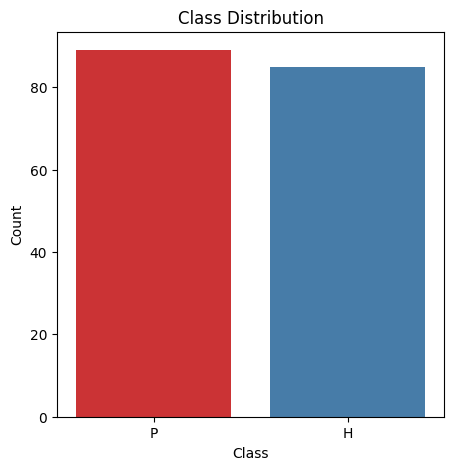

In [9]:
plt.figure(figsize=(5,5))
sns.countplot(data=dt, x='class', palette='Set1')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

In [20]:
y = dt['class']

X = dt.drop(['class', 'ID'], axis=1)

X.head()

,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,mean_jerk_in_air1,...,mean_gmrt25,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25
0,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,0.051836,...,249.729085,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605
1,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,0.039827,...,77.258394,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640
2,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,0.064220,...,193.667018,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025
3,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,0.090408,...,163.065803,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220
4,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,0.037528,...,147.094679,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575


In [21]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(139, 450)
(35, 450)
(139,)
(35,)


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [23]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# RandomForestClassifier için parametreler
rf_params = {
    'class_weight': 'balanced',
    'n_estimators': 100,
    'max_depth': 10,  # Düzeltme: Her iki model için max_depth parametresi 10 olarak ayarlandı
    'random_state': 42
}

# GradientBoostingClassifier için parametreler
gb_params = {
    'learning_rate': 0.089,
    'n_estimators': 100,
    'max_depth': 10,  # Düzeltme: Her iki model için max_depth parametresi 10 olarak ayarlandı
    'min_samples_split': 4,
    'min_samples_leaf': 6,
    'subsample': 0.868,
    'random_state': 42
}

# LogisticRegression için parametreler
lr_params = {
}

# RandomForestClassifier modelini oluşturma
rf = RandomForestClassifier(**rf_params)

# GradientBoostingClassifier modelini oluşturma
gb = GradientBoostingClassifier(**gb_params)

# LogisticRegression modelini oluşturma
lr = LogisticRegression(**lr_params)

# Eğitim verileriyle RandomForestClassifier modelini eğitme
rf.fit(X_train, y_train)

# Eğitim verileriyle GradientBoostingClassifier modelini eğitme
gb.fit(X_train, y_train)

# Eğitim verileriyle LogisticRegression modelini eğitme
lr.fit(X_train, y_train)

# Test verileri üzerinde tahmin yapma ve doğruluk hesaplama
rf_pred = rf.predict(X_test)
gb_pred = gb.predict(X_test)
lr_pred = lr.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)

print("RF Accuracy:", rf_accuracy)
print("GB Accuracy:", gb_accuracy)
print("LR Accuracy:", lr_accuracy)


RF Accuracy: 0.8857142857142857
GB Accuracy: 0.8857142857142857
LR Accuracy: 0.9428571428571428


C:\Users\taydin\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


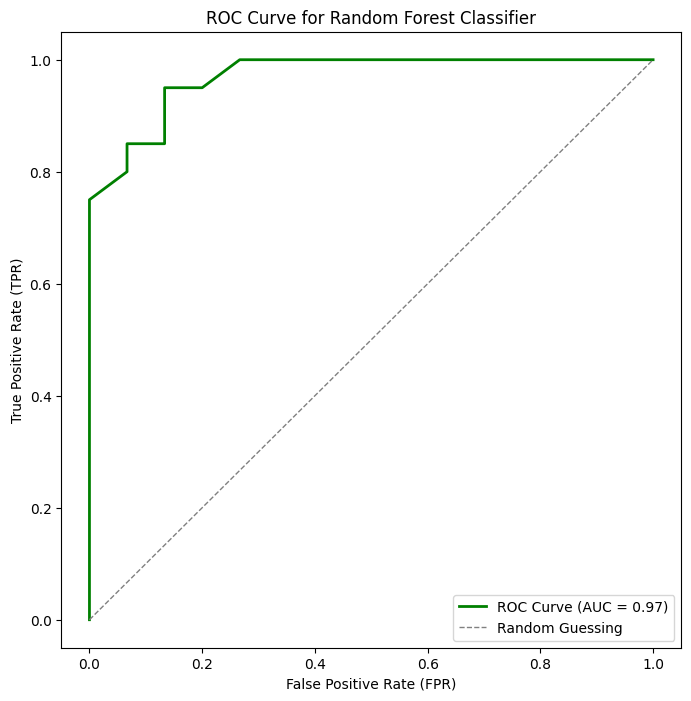

In [12]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

rf.fit(X_train, y_train)
rf_probs = rf.predict_proba(X_test)[:, 1]

y_test_binary = label_binarize(y_test, classes=['H', 'P'])

fpr_rf, tpr_rf, _ = roc_curve(y_test_binary, rf_probs)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Guessing')
plt.title('ROC Curve for Random Forest Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

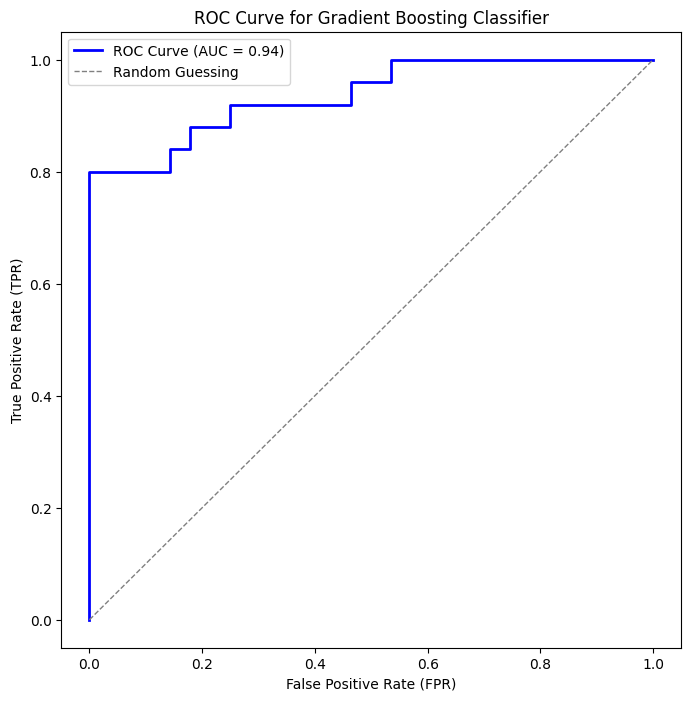

In [52]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_test_binary = label_binarize(y_test, classes=['H', 'P'])

gb_probs = gb.predict_proba(X_test)[:, 1]

fpr_gb, tpr_gb, _ = roc_curve(y_test_binary, gb_probs)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(8, 8))
plt.plot(fpr_gb, tpr_gb, color='blue', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_gb))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Guessing')
plt.title('ROC Curve for Gradient Boosting Classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

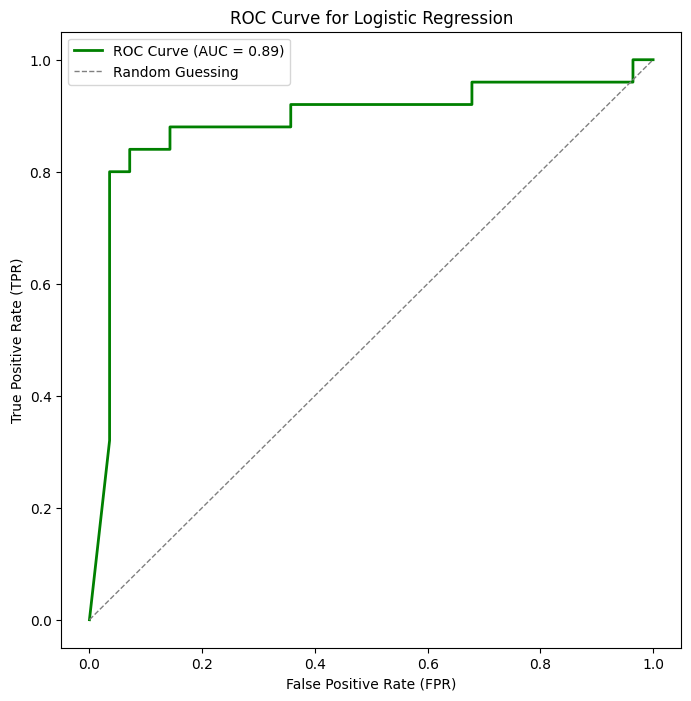

In [53]:
lr_probs = lr.predict_proba(X_test)[:, 1]

y_test_binary = label_binarize(y_test, classes=['H', 'P'])

fpr_lr, tpr_lr, _ = roc_curve(y_test_binary, lr_probs)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 8))
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_lr))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Guessing')
plt.title('ROC Curve for Logistic Regression')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

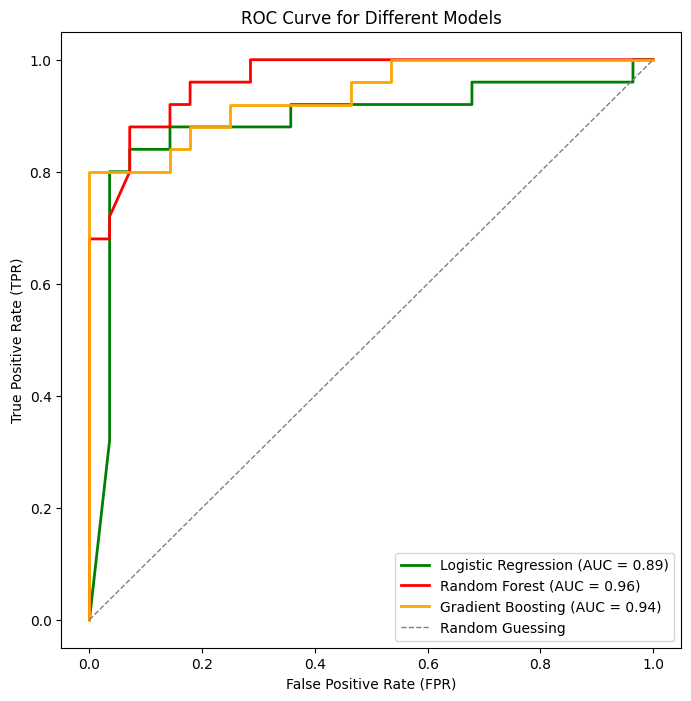

In [54]:
plt.figure(figsize=(8, 8))

# Her bir model için ROC eğrilerini çizin
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_lr))
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot(fpr_gb, tpr_gb, color='orange', lw=2, label='Gradient Boosting (AUC = {:.2f})'.format(roc_auc_gb))

# Random Guessing çizgisini ekleyin
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Guessing')

# Eksen etiketleri ve başlık ekleyin
plt.title('ROC Curve for Different Models')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')

# Açıklamayı göster
plt.legend()

# Grafik göster
plt.show()

In [55]:

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Gradient Booster', 'Random Forest'],
    'Accuracy': [lr_accuracy, gb_accuracy, rf_accuracy],

})

print(results)

                 Model  Accuracy
0  Logistic Regression  0.867925
1     Gradient Booster  0.849057
2        Random Forest  0.886792


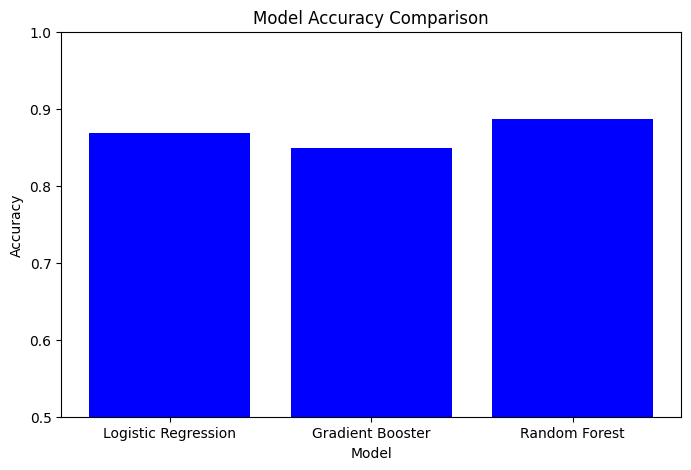

In [56]:
import matplotlib.pyplot as plt

# Model isimleri
models = ['Logistic Regression', 'Gradient Booster', 'Random Forest']

# Doğruluk değerleri
accuracies = [lr_accuracy,  gb_accuracy, rf_accuracy]

# Çubuk grafik çizimi
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color='blue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.5, 1.0)  # Y eksenini belirli bir aralıkta tutmak istiyorsanız
plt.show()


In [57]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(   random_state=42)
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", scores)

print("Mean Accuracy:", scores.mean())
std_accuracy = scores.std()
print("Standard Deviation of Accuracy:", std_accuracy)

Cross-Validation Scores: [1.         0.79166667 0.95833333 0.83333333 0.875     ]
Mean Accuracy: 0.8916666666666668
Standard Deviation of Accuracy: 0.07728015412913088


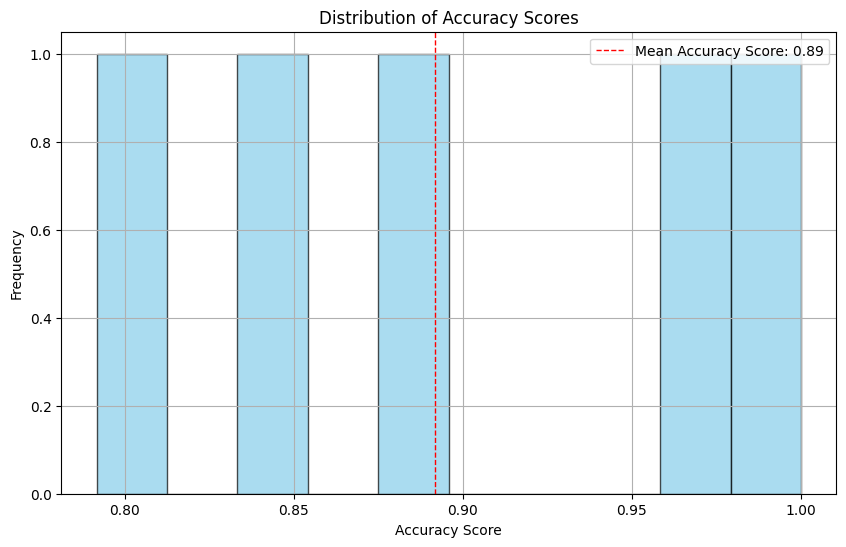

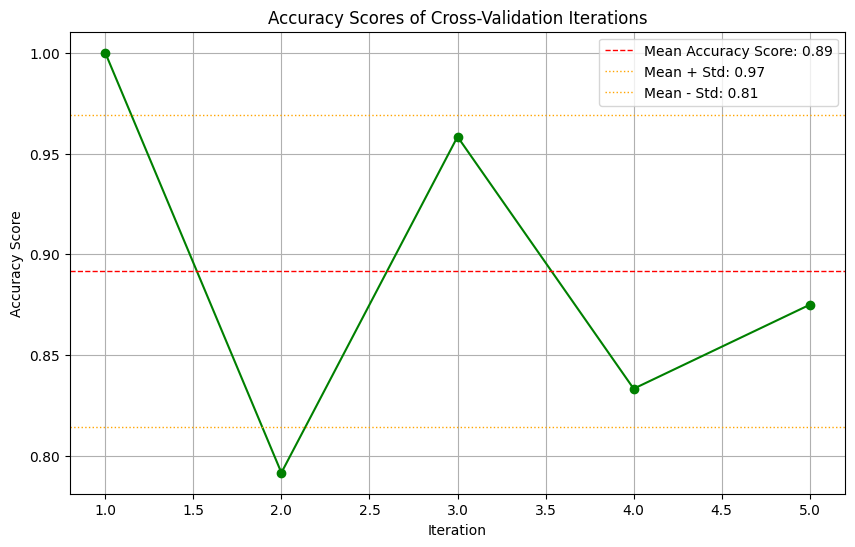

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Creating a histogram to show the distribution of accuracy scores
plt.figure(figsize=(10, 6))
plt.hist(scores, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=scores.mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Accuracy Score: {:.2f}'.format(scores.mean()))
plt.title('Distribution of Accuracy Scores')
plt.xlabel('Accuracy Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Creating a line plot to show the accuracy scores of each cross-validation iteration
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='green')
plt.axhline(y=scores.mean(), color='red', linestyle='dashed', linewidth=1, label='Mean Accuracy Score: {:.2f}'.format(scores.mean()))
plt.axhline(y=scores.mean() + std_accuracy, color='orange', linestyle='dotted', linewidth=1, label='Mean + Std: {:.2f}'.format(scores.mean() + std_accuracy))
plt.axhline(y=scores.mean() - std_accuracy, color='orange', linestyle='dotted', linewidth=1, label='Mean - Std: {:.2f}'.format(scores.mean() - std_accuracy))
plt.title('Accuracy Scores of Cross-Validation Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid(True)
plt.show()


In [59]:
from sklearn.model_selection import KFold
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

for model_name, model in models.items():
    outer_scores = []
    for train_index, test_index in outer_cv.split(X):
        X_train_outer, X_test_outer = X.iloc[train_index], X.iloc[test_index]  # DataFrame satırlarını seç
        y_train_outer, y_test_outer = y.iloc[train_index], y.iloc[test_index]  # DataFrame satırlarını seç

        # İç çapraz doğrulama için KFold nesnesini oluştur
        inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)

        # İç çapraz doğrulama döngüsü
        inner_scores = []
        for inner_train_index, inner_test_index in inner_cv.split(X_train_outer):
            X_train_inner, X_test_inner = X_train_outer.iloc[inner_train_index], X_train_outer.iloc[inner_test_index]  # DataFrame satırlarını seç
            y_train_inner, y_test_inner = y_train_outer.iloc[inner_train_index], y_train_outer.iloc[inner_test_index]  # DataFrame satırlarını seç

            # Modeli eğit
            model.fit(X_train_inner, y_train_inner)

            # Modelin performansını ölç ve kaydet
            score = model.score(X_test_inner, y_test_inner)
            inner_scores.append(score)

        # İç döngüden elde edilen en iyi hiperparametrelerle modeli eğit ve test et
        best_params_index = np.argmax(inner_scores)
        best_params = inner_scores[best_params_index]

        # Modeli tekrar eğit ve dış katman performansını ölç
        model.fit(X_train_outer, y_train_outer)
        outer_score = model.score(X_test_outer, y_test_outer)
        outer_scores.append(outer_score)

    # Sonuçları yazdır
    print("Model:", model_name)
    print("Outer CV Mean Accuracy:", np.mean(outer_scores))
    print("Outer CV Standard Deviation of Accuracy:", np.std(outer_scores))
    print("")


Model: Random Forest
Outer CV Mean Accuracy: 0.8443697478991596
Outer CV Standard Deviation of Accuracy: 0.04511720802840341

Model: Gradient Boosting
Outer CV Mean Accuracy: 0.8504201680672269
Outer CV Standard Deviation of Accuracy: 0.04625972186578491

Model: Logistic Regression
Outer CV Mean Accuracy: 0.827563025210084
Outer CV Standard Deviation of Accuracy: 0.06518408907502163



In [60]:
from sklearn.model_selection import cross_val_score
gb = GradientBoostingClassifier(   random_state=42)
scores = cross_val_score(gb, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", scores)

print("Mean Accuracy:", scores.mean())
std_accuracy = scores.std()
print("Standard Deviation of Accuracy:", std_accuracy)

Cross-Validation Scores: [0.92       0.625      0.91666667 0.66666667 0.625     ]
Mean Accuracy: 0.7506666666666666
Standard Deviation of Accuracy: 0.13774614332169158


In [8]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Optimize edilecek modellerin listesi
models = {
    'GradientBoosting': GradientBoostingClassifier,
    'RandomForest': RandomForestClassifier,
    'LogisticRegression': LogisticRegression
}

# Hedef fonksiyonunu tanımlama
def objective_gb(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 0.9)
    }
    model = GradientBoostingClassifier(**params, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    return scores.mean()

def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    }
    model = RandomForestClassifier(**params, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    return scores.mean()

def objective_lr(trial):
    params = {
        'C': trial.suggest_float('C', 0.001, 10),
        'max_iter': trial.suggest_int('max_iter', 10, 100),
    }
    model = LogisticRegression(**params, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    return scores.mean()

# Her bir model için hiperparametre optimizasyonunu gerçekleştirme
best_hyperparameters = {}
best_accuracy = {}
for model_name, objective_func in zip(models.keys(), [objective_gb, objective_rf, objective_lr]):
    study = optuna.create_study(direction='maximize')
    study.optimize(objective_func, n_trials=100)
    best_hyperparameters[model_name] = study.best_params
    best_accuracy[model_name] = study.best_value

# Her bir modelin en iyi hiperparametrelerini ve performansını yazdırma
for model_name, params in best_hyperparameters.items():
    print(f"Best hyperparameters for {model_name}: {params}")
    print(f"Best accuracy for {model_name}: {best_accuracy[model_name]}")


[I 2024-04-22 02:53:37,725] A new study created in memory with name: no-name-b779c362-b108-419f-b2c2-293ea8f8eca1
[I 2024-04-22 02:53:48,392] Trial 0 finished with value: 0.8708994708994707 and parameters: {'learning_rate': 0.07367067940803122, 'n_estimators': 122, 'max_depth': 7, 'min_samples_split': 20, 'min_samples_leaf': 1, 'subsample': 0.7156754904962813}. Best is trial 0 with value: 0.8708994708994707.
[I 2024-04-22 02:54:02,198] Trial 1 finished with value: 0.8846560846560847 and parameters: {'learning_rate': 0.0881461731631288, 'n_estimators': 195, 'max_depth': 9, 'min_samples_split': 4, 'min_samples_leaf': 8, 'subsample': 0.8459182879788499}. Best is trial 1 with value: 0.8846560846560847.
[I 2024-04-22 02:54:46,770] Trial 2 finished with value: 0.8634920634920636 and parameters: {'learning_rate': 0.09801875064422616, 'n_estimators': 191, 'max_depth': 8, 'min_samples_split': 20, 'min_samples_leaf': 1, 'subsample': 0.8311935995020273}. Best is trial 1 with value: 0.884656084656

Best hyperparameters for GradientBoosting: {'learning_rate': 0.04723914776868458, 'n_estimators': 132, 'max_depth': 5, 'min_samples_split': 6, 'min_samples_leaf': 10, 'subsample': 0.7218723693859673}
Best accuracy for GradientBoosting: 0.9206349206349206
Best hyperparameters for RandomForest: {'n_estimators': 182, 'max_depth': 5, 'min_samples_split': 17, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
Best accuracy for RandomForest: 0.9063492063492063
Best hyperparameters for LogisticRegression: {'C': 4.279891894468527, 'max_iter': 18}
Best accuracy for LogisticRegression: 0.8558201058201058


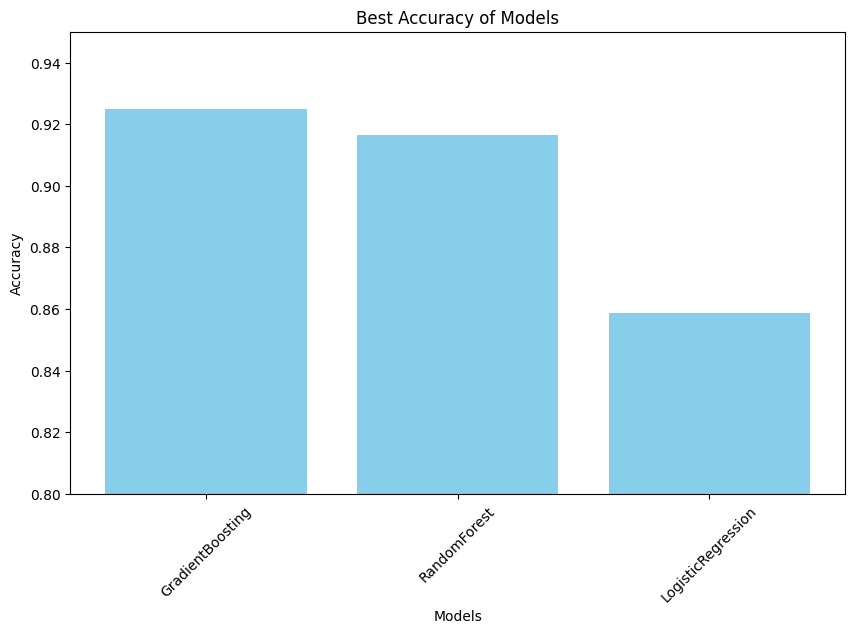

In [24]:
import matplotlib.pyplot as plt

best_hyperparameters = {
    'GradientBoosting': {'learning_rate': 0.09509533448584132, 'n_estimators': 154, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 6, 'subsample': 0.856108022169037},
    'RandomForest': {'n_estimators': 92, 'max_depth': 7, 'min_samples_split': 19, 'min_samples_leaf': 1, 'max_features': 'log2'},
    'LogisticRegression': {'C': 0.21941347003066944, 'max_iter': 534}
}

accuracies = {
    'GradientBoosting': 0.925,
    'RandomForest': 0.9166666666666666,
    'LogisticRegression': 0.8586666666666668
}

# Model isimleri ve en iyi doğruluklar
models = list(best_hyperparameters.keys())
accuracy_values = list(accuracies.values())

# Çubuk grafik oluşturma
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_values, color='skyblue')
plt.title('Best Accuracy of Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.8, 0.95)
plt.xticks(rotation=45)
plt.show()
